**IMPORTING PACKAGES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore






## LOADING DATASET

In [ ]:

data = pd.read_csv("/content/drive/MyDrive/Flipkart_Mobiles (1).csv")


# DATASET OVERVIEW

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


In [ ]:
data.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [ ]:
data.shape

(3114, 8)

In [ ]:
data.describe()

,Rating,Selling Price,Original Price
count,2970.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025
std,0.271991,30066.892622,31525.599889
min,2.300000,1000.000000,1000.000000
25%,4.100000,9990.000000,10030.250000
50%,4.300000,15000.000000,16889.500000
75%,4.400000,28999.000000,31500.000000
max,5.000000,179900.000000,189999.000000


# FINDING MISSING VALUES

In [ ]:

data.isnull().sum()


,0
Brand,0
Model,0
Color,0
Memory,43
Storage,39
Rating,144
Selling Price,0
Original Price,0


**FILLING MISSING VALUES**

In [ ]:

data['Memory'] = data['Memory'].fillna(data['Memory'].mode()[0])
data['Storage'] = data['Storage'].fillna(data['Storage'].mode()[0])
data['Rating'] = data['Rating'].fillna(data['Rating'].median())
data.isnull().sum()


,0
Brand,0
Model,0
Color,0
Memory,0
Storage,0
Rating,0
Selling Price,0
Original Price,0


**Remove unnecessary spaces or extra characters**

In [ ]:

data['Brand'] = data['Brand'].str.strip()
data['Model'] = data['Model'].str.strip()
data['Color'] = data['Color'].str.strip()
data['Memory'] = data['Memory'].str.strip()
data['Storage'] = data['Storage'].str.strip()
data.head()


,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


# DETECTING OUTLIERS

In [ ]:


numerical_cols = ['Rating', 'Selling Price', 'Original Price']


data_zscore = data[numerical_cols].apply(zscore)
zscore_threshold = 3

outliers = (np.abs(data_zscore) > zscore_threshold).any(axis=1)

outlier_rows = data[outliers]

print("Outliers detected:")
print(outlier_rows)


Outliers detected:
      Brand              Model         Color Memory Storage  Rating  \
197    OPPO            R1 R829         White   1 GB   16 GB     3.0   
201    OPPO            R1 R829         Black   1 GB   16 GB     3.0   
242    OPPO              N5111         White   2 GB   16 GB     3.1   
302      LG           Max X160  Silver Titan   1 GB    8 GB     3.4   
341      LG                 Q7         Black   3 GB   32 GB     3.3   
...     ...                ...           ...    ...     ...     ...   
3054  Apple  iPhone 13 Pro Max        Silver    4GB  256 GB     4.7   
3055  Apple  iPhone 13 Pro Max   Sierra Blue    4GB  512 GB     4.7   
3056  Apple  iPhone 13 Pro Max          Gold    4GB  512 GB     4.7   
3057  Apple  iPhone 13 Pro Max      Graphite    4GB    1 TB     4.7   
3058  Apple  iPhone 13 Pro Max   Sierra Blue    4GB    1 TB     4.7   

      Selling Price  Original Price  
197           21452           21452  
201           24990           24990  
242           

#HANDLING OUTLIERS


Cleaned Data:
<class 'pandas.core.frame.DataFrame'>
Index: 2968 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           2968 non-null   object 
 1   Model           2968 non-null   object 
 2   Color           2968 non-null   object 
 3   Memory          2968 non-null   object 
 4   Storage         2968 non-null   object 
 5   Rating          2968 non-null   float64
 6   Selling Price   2968 non-null   int64  
 7   Original Price  2968 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 208.7+ KB
None


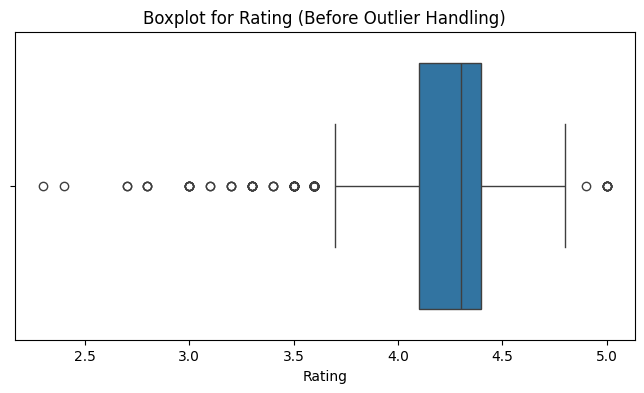

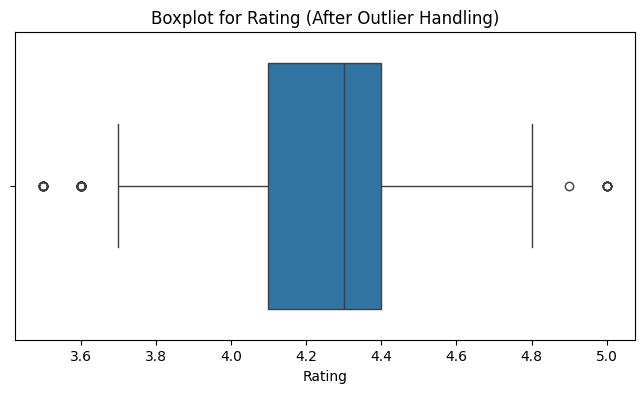

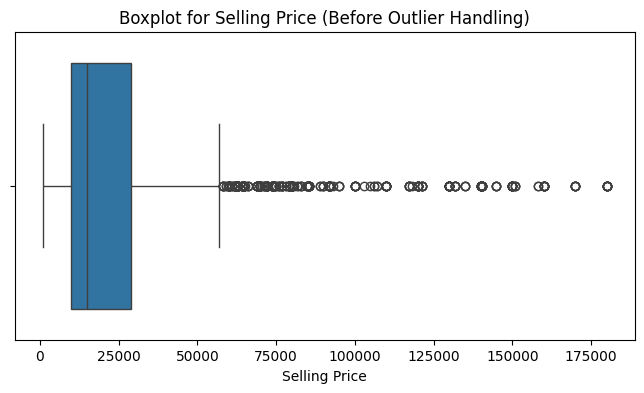

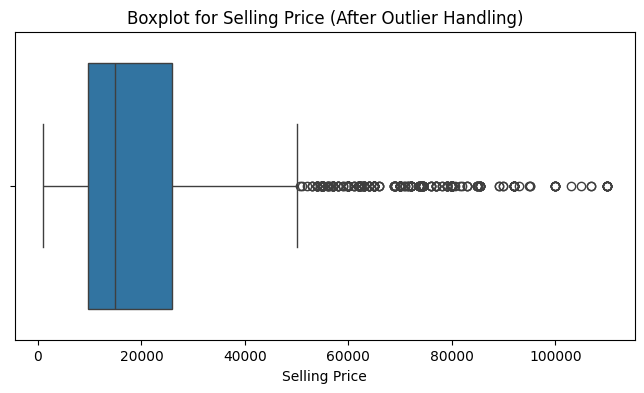

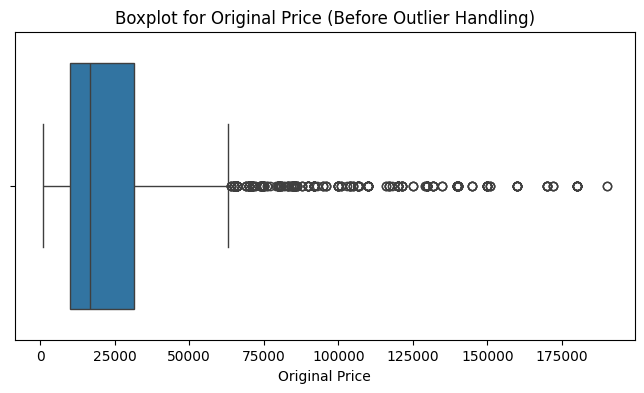

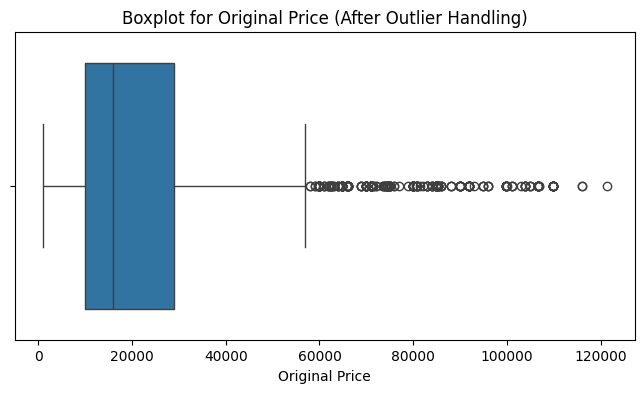

In [ ]:

cleaned_data = data[~outliers]


print("\nCleaned Data:")
print(cleaned_data.info())


for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col} (Before Outlier Handling)")
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=cleaned_data[col])
    plt.title(f"Boxplot for {col} (After Outlier Handling)")
    plt.show()

In [ ]:
cleaned_data.isnull().sum()

,0
Brand,0
Model,0
Color,0
Memory,0
Storage,0
Rating,0
Selling Price,0
Original Price,0


# PROCESS OF LABEL ENCODING AND SPLITING


In [ ]:
import pickle
from sklearn.preprocessing import LabelEncoder


encoders = {}
categorical_columns = ["Brand", "Model", "Color", "Memory", "Storage"]

for col in categorical_columns:
    le = LabelEncoder()
    cleaned_data[col] = le.fit_transform(cleaned_data[col])
    encoders[col] = le


with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

<ipython-input-13-0e11963dd133>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col] = le.fit_transform(cleaned_data[col])
<ipython-input-13-0e11963dd133>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col] = le.fit_transform(cleaned_data[col])
<ipython-input-13-0e11963dd133>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [ ]:
from sklearn.model_selection import train_test_split

X = cleaned_data.drop('Selling Price', axis=1)
y = cleaned_data['Selling Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2374, 7)
X_test shape: (594, 7)
y_train shape: (2374,)
y_test shape: (594,)


In [ ]:
cleaned_data.isnull().sum()

,0
Brand,0
Model,0
Color,0
Memory,0
Storage,0
Rating,0
Selling Price,0
Original Price,0


# LINEAR REGRESSION **MODEL**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

linear_reg_predictions = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, linear_reg_predictions)
r2 = r2_score(y_test, linear_reg_predictions)

print("Linear Regression Model:")
print(f"  Mean Squared Error (MSE): {mse}")
print(f"  R-squared (R2): {r2}")

Linear Regression Model:
  Mean Squared Error (MSE): 21560641.21987942
  R-squared (R2): 0.9464173049757852


In [ ]:
linear_reg_predictions = linear_reg.predict(X_train)

r2 = r2_score(y_train, linear_reg_predictions)
print(f"  R-squared (R2): {r2}")


  R-squared (R2): 0.963125535398552


CALCULATING THE ACCURACY

# RANDOMFOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



rf_reg = RandomForestRegressor(random_state=42)


rf_reg.fit(X_train, y_train)


rf_reg_predictions = rf_reg.predict(X_test)

mse = mean_squared_error(y_test, rf_reg_predictions)
r2 = r2_score(y_test, rf_reg_predictions)

print("Random Forest Regression Model:")
print(f"  Mean Squared Error (MSE): {mse}")
print(f"  R-squared (R2): {r2}")

Random Forest Regression Model:
  Mean Squared Error (MSE): 13699011.937411068
  R-squared (R2): 0.9659550951528018


In [ ]:
rf_reg_predictions = rf_reg.predict(X_train)
r2 = r2_score(y_train, rf_reg_predictions)
print(f"  R-squared (R2): {r2}")


  R-squared (R2): 0.9974254769285867


# DECISIONTREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



tree_reg = DecisionTreeRegressor(random_state=42)

tree_reg.fit(X_train, y_train)


tree_reg_predictions = tree_reg.predict(X_test)

mse = mean_squared_error(y_test, tree_reg_predictions)
r2 = r2_score(y_test, tree_reg_predictions)

print("Decision Tree Regression Model:")
print(f"  Mean Squared Error (MSE): {mse}")
print(f"  R-squared (R2): {r2}")

Decision Tree Regression Model:
  Mean Squared Error (MSE): 16745285.626262626
  R-squared (R2): 0.9583844690120763


In [ ]:
tree_reg_predictions = tree_reg.predict(X_train)
r2 = r2_score(y_train, tree_reg_predictions)
print(f"  R-squared (R2): {r2}")



  R-squared (R2): 0.999999998675953


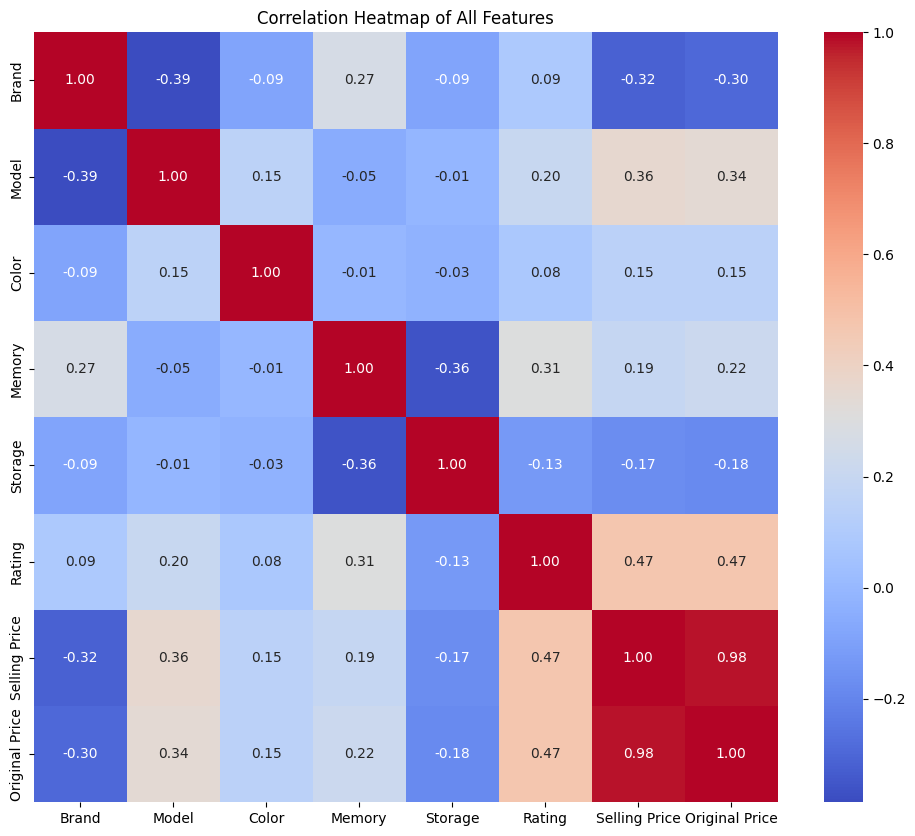

In [ ]:

correlation_matrix = cleaned_data.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Features')
plt.show()


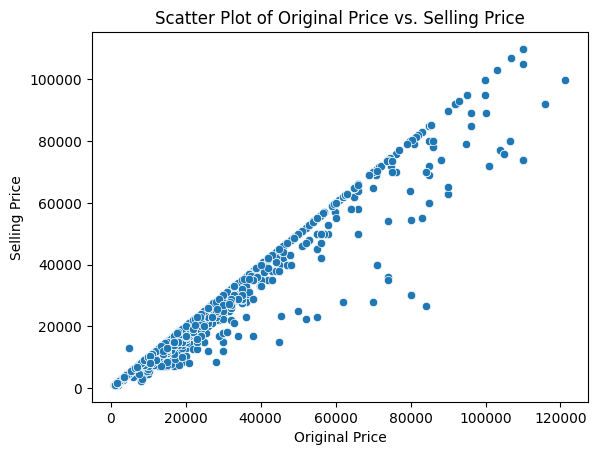

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.scatterplot(x='Original Price', y='Selling Price', data=cleaned_data)
plt.title('Scatter Plot of Original Price vs. Selling Price')
plt.xlabel('Original Price')
plt.ylabel('Selling Price')
plt.show()

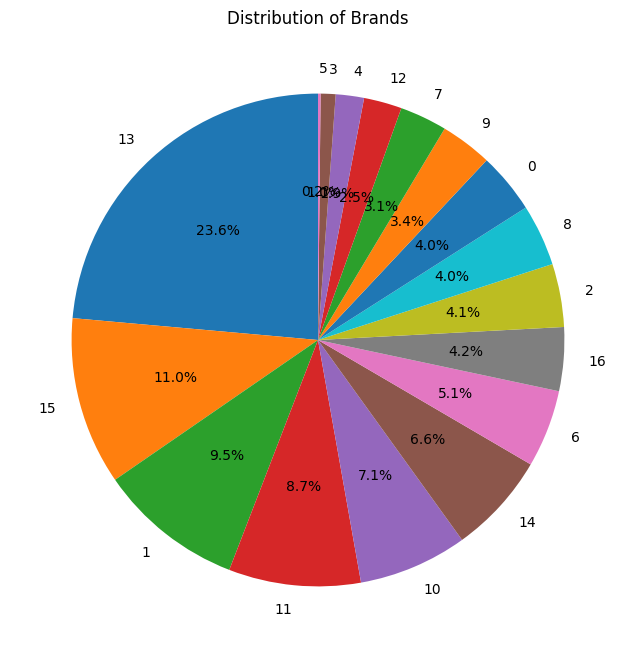

In [ ]:
import matplotlib.pyplot as plt


brand_counts = cleaned_data['Brand'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Brands')
plt.show()

In [ ]:
import pickle

filename = 'rf_reg_model.pkl'


with open(filename, 'wb') as file:
    pickle.dump(rf_reg, file)

print(f"Model saved as {filename}")

Model saved as rf_reg_model.pkl


In [ ]:



rf_reg_predictions = rf_reg.predict(X_test)


comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_reg_predictions})


print(comparison_df.head())


for actual, predicted in zip(y_test, rf_reg_predictions):
    print(f"Actual: {actual}, Predicted: {predicted}")

      Actual  Predicted
2520   13990   13000.93
1277   31999   29307.15
2525    8990    8960.50
336    30990   29638.82
1576   14999   16066.96
Actual: 13990, Predicted: 13000.93
Actual: 31999, Predicted: 29307.15
Actual: 8990, Predicted: 8960.5
Actual: 30990, Predicted: 29638.82
Actual: 14999, Predicted: 16066.96
Actual: 73600, Predicted: 71177.75
Actual: 15999, Predicted: 15989.32
Actual: 34990, Predicted: 34440.16
Actual: 10490, Predicted: 10252.13
Actual: 15599, Predicted: 15471.74
Actual: 6999, Predicted: 6958.86
Actual: 99900, Predicted: 99551.98
Actual: 34990, Predicted: 33679.12
Actual: 14999, Predicted: 14311.13
Actual: 10990, Predicted: 10053.8
Actual: 8498, Predicted: 8516.36
Actual: 19119, Predicted: 18587.28
Actual: 1625, Predicted: 1597.52
Actual: 9000, Predicted: 8894.16
Actual: 15000, Predicted: 15009.34
Actual: 7290, Predicted: 7135.62
Actual: 10070, Predicted: 9872.02
Actual: 10490, Predicted: 9822.91
Actual: 99900, Predicted: 99551.98
Actual: 7199, Predicted: 7478.23